In [13]:
import pandas as pd 
import numpy as np
import sklearn
from matplotlib import pyplot as plt 
import seaborn as sns

In [14]:
happy = pd.read_csv('World Happiness Report.csv')
life = pd.read_csv('Life Expectancy Data.csv')

In [15]:
happy.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [16]:
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [17]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [18]:
happy.columns

Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')

## Visualization 1

This is a helpful visualization for our project because we can already start to see the difference in means between life expectancies in nations classified as developed versus undeveloped. Later on, we are going to see if we can effectively predict whether or not a nation is developed based on variables like life expectancy. We can see that this is probably a good feature to use. 

Text(0.5, 1.0, 'Life Expectancy of Developed vs Undeveloped Countries')

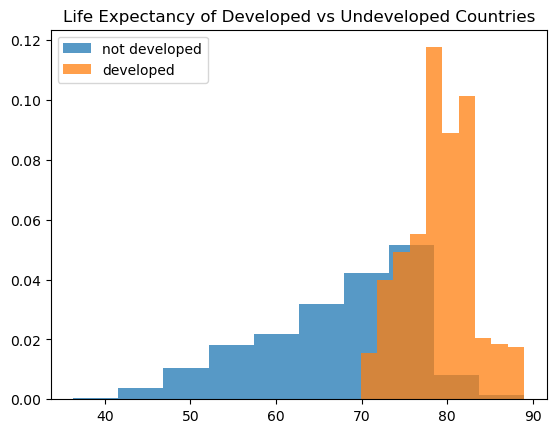

In [23]:
not_developed = np.where(life['Status'] == 'Developing')[0]
developed = np.where(life['Status'] == 'Developed')[0]

plt.hist(life['Life expectancy '][not_developed], alpha = .75, density = True, label = 'not developed')
plt.hist(life['Life expectancy '][developed], alpha = .75, density = True, label = 'developed')
plt.legend()
plt.title("Life Expectancy of Developed vs Undeveloped Countries")

## Visualization 2

This visualization shows us the distribution of ladder scores (happiness ranking) according to whether the country is developed or not.

We can see that the Ladder Scores for the for the Developed countries tend to be a bit higher compared to the Developing countries. 

This is relevant to our research question because this was a relationship we were going to explore with our hypothesis testing. This visualization shows us that Developed and Developing countries don't come from the same distribution, so we'd like to see if we can explore the correlation between them.

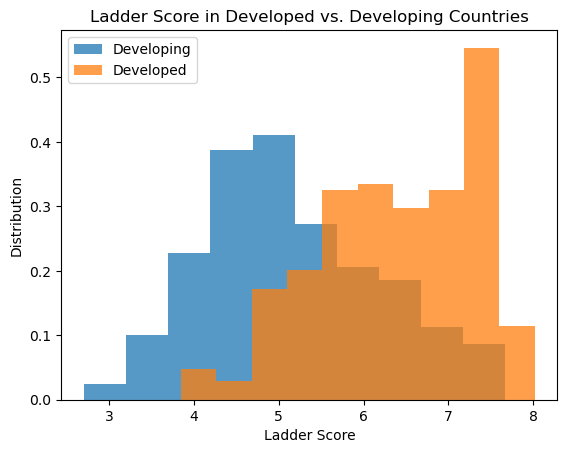

In [24]:
developing = merged.loc[merged['Status'] == 'Developing']
developed = merged.loc[merged['Status'] == 'Developed']

plt.hist(developing['Life Ladder'], density = True, alpha = .75)
plt.hist(developed['Life Ladder'], density = True, alpha = .75)

plt.xlabel('Ladder Score')
plt.ylabel('Distribution')
plt.title('Ladder Score in Developed vs. Developing Countries')
plt.legend(['Developing', 'Developed'])

In [25]:
happy = happy.rename(columns={"Country Name": "Country"})

In [26]:
merged = life.merge(happy, how = 'inner', on = ['Country', 'Year'])

In [27]:
columns = ['Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling',
       'Life Ladder', 'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government']

## Visualization 3

This visualization shows us how similar the life expectancy is from World Health Organization and from the World Happiness Report. The trend is that developed countries, shown in yellow, have a much higher life expectancy than developing countries, shown in purple. It makes sense that the life expectancy’s in both tables are similar. If they were very different and not highly correlated this would have been a read flag for us. 

In [28]:
def dev_or_not(series):
    """
    developed --> 1
    developing --> 0
    """
    to_return = []
    for string in series: 
        if string == 'Developed':
            to_return.append(1)
        else:
            to_return.append(0)
    return pd.Series(to_return)

copy_merged = merged
binary_status = dev_or_not(copy_merged['Status'])
copy_merged['Status'] = binary_status


Text(0, 0.5, 'Life Expectancy from World Happiness Report')

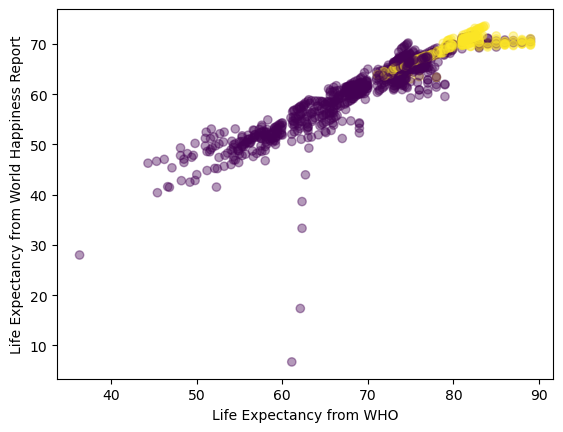

In [29]:
plt.scatter(x = copy_merged['Life expectancy '], y= copy_merged['Healthy Life Expectancy At Birth'], c=copy_merged['Status'], alpha=0.4)
plt.xlabel('Life Expectancy from WHO')
plt.ylabel('Life Expectancy from World Happiness Report')

## Visualization 4

These histograms are going to help us identify the prior distributions of our features. These are all for our likelihood terms in our analyses. "Schooling" is normal, "life ladder" is normal, "adult mortality" is beta, "total expenditure" is normal, "alcohol" is exponential, "population" is uniform, "GDP" is exponential, "BMI" multivariate normal", the disease variables are exponential, "thinness" is exponential, and the qualitative happiness features are normal and skewed normal. 

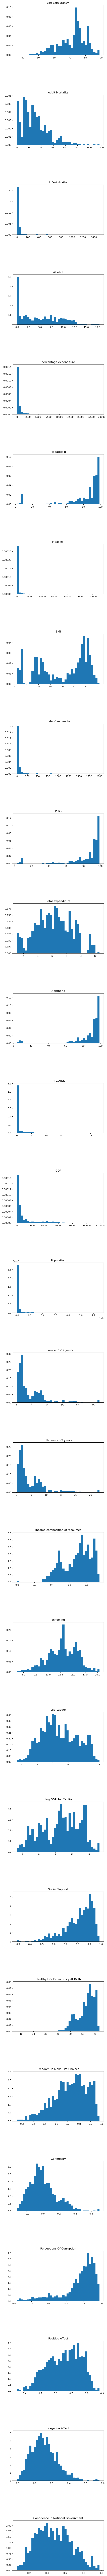

In [34]:
fig, ax = plt.subplots(len(columns), 1, figsize=(7, 200))


for feature in np.arange(len(columns)): 
    plt.subplots_adjust(hspace=0.8)
    ax[feature].hist(merged[columns[feature]], bins = 40, density = True)
    ax[feature].set_title(columns[feature])